In [1]:
import numpy as np
import pandas as pd
import keras
from sklearn import metrics
from IPython.display import display, HTML 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt

%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
from tensorflow.keras.optimizers import SGD
import requests
from io import BytesIO


import os

os.getcwd()

Using TensorFlow backend.


'C:\\Users\\nilsi\\Desktop\\git\\[9] Autoencoder for my photos'

In [2]:
os.chdir(os.getcwd().replace("\\[9] Autoencoder for my photos","\\son_img"))

In [4]:
os.listdir()

['IMG_6504.JPG',
 'IMG_6512.JPG',
 'IMG_6550.JPG',
 'IMG_6776.JPG',
 'IMG_6898.JPG',
 'IMG_7047.JPG',
 'IMG_7074.JPG',
 'IMG_7075.JPG',
 'IMG_7076.JPG',
 'IMG_7144.JPG',
 'IMG_7200.JPG',
 'IMG_E7211.JPG']

In [5]:
photo = Image.open("IMG_7074.JPG")

In [6]:
img = photo.resize((128,128), Image.ANTIALIAS)

In [7]:
photo = photo.resize((128,128))

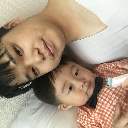

In [8]:
photo

In [9]:
img_array = np.asarray(photo)
img_array = img_array.flatten()
img_array = np.array([ img_array ])
img_array = img_array.astype(np.float32)
print(img_array.shape[1])
print(img_array)

49152
[[220. 220. 196. ... 194. 165. 131.]]


In [ ]:
model = Sequential()
model.add(Dense(20, input_dim=img_array.shape[1], activation='relu'))
model.add(Dense(img_array.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(img_array,img_array,verbose=0,epochs=500)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [ ]:
print("Neural network output")
pred = model.predict(img_array)
print(pred)
print(img_array)
cols,rows = img.size
img_array2 = pred[0].reshape(rows,cols,3)
img_array2 = img_array2.astype(np.uint8)
img2 = Image.fromarray(img_array2, 'RGB')


In [ ]:
img2

# standardized shape

In [ ]:
list_imgs=os.listdir()

In [ ]:
%matplotlib inline
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML

In [ ]:
def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img

In [ ]:
x = [] 
    
for imgs in list_imgs:
    ImageFile.LOAD_TRUNCATED_IMAGES = False
#     response = requests.get(url)
    img = Image.open(imgs)
    img.load()
    
    img = make_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    display(img)
    img_array = np.asarray(img)
    img_array = img_array.flatten()
    img_array = img_array.astype(np.float32)
    img_array = (img_array-128)/128
    x.append(img_array)
    

x = np.array(x)

print(x.shape)

# Denoise

In [1]:
import os
import numpy as np
import pandas as pd
import keras
from sklearn import metrics
from IPython.display import display, HTML 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD
from PIL import Image, ImageFile
import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow
from io import BytesIO

%matplotlib inline


Using TensorFlow backend.


'C:\\Users\\nilsi\\Desktop\\git\\[9] Autoencoder for my photos'

In [4]:
os.chdir(os.getcwd().replace("\\[9] Autoencoder for my photos","\\son_img"))

list_imgs=os.listdir()

os.listdir()

In [7]:
photo = Image.open("IMG_E7211.JPG")

img = photo.resize((128,128), Image.ANTIALIAS)

photo = photo.resize((128,128))

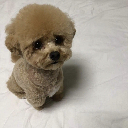

In [8]:
photo

In [9]:
def add_noise(a, ratio=20):
    a2 = a.copy()
    rows = a2.shape[0]
    cols = a2.shape[1]
    s = int(min(rows,cols)/ratio) # size of spot is 1/20 of smallest dimension
    
    for i in range(100):
        x = np.random.randint(cols-s)
        y = np.random.randint(rows-s)
        a2[y:(y+s),x:(x+s)] = 0
        
    return a2

Rows: 128, Cols: 128
(128, 128, 3)


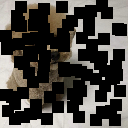

In [10]:

img_array = np.asarray(photo)
rows = img_array.shape[0]
cols = img_array.shape[1]

print("Rows: {}, Cols: {}".format(rows,cols))

# Create new image
img2_array = img_array.astype(np.uint8)
print(img2_array.shape)
img2_array = add_noise(img2_array, 10)
img2 = Image.fromarray(img2_array, 'RGB')
img2

In [11]:
from PIL import Image, ImageFile
from matplotlib.pyplot import imshow
import requests
import numpy as np
from io import BytesIO
from IPython.display import display, HTML

#url = "http://www.heatonresearch.com/images/about-jeff.jpg"


In [12]:
def make_square(img):
    cols,rows = img.size
    
    if rows>cols:
        pad = (rows-cols)/2
        img = img.crop((pad,0,cols,cols))
    else:
        pad = (cols-rows)/2
        img = img.crop((0,pad,rows,rows))
    
    return img

In [13]:
x = []    
y = []
loaded_images = []

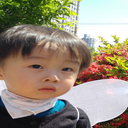

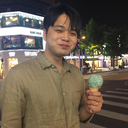

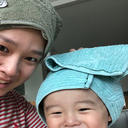

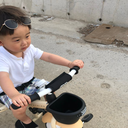

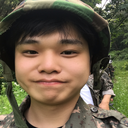

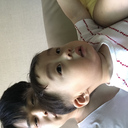

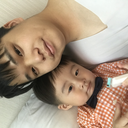

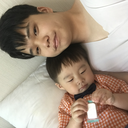

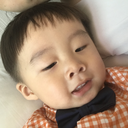

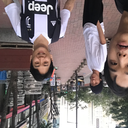

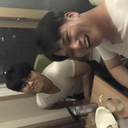

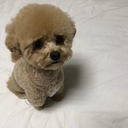

In [14]:
for img in list_imgs:
    img = Image.open(img)
    
    img = make_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)
    
    loaded_images.append(img)
    display(img)
    for i in range(10):
        img_array = np.asarray(img)
        img_array_noise = add_noise(img_array, 10)
        
        img_array = img_array.flatten()
        img_array = img_array.astype(np.float32)
        img_array = (img_array-128)/128
        
        img_array_noise = img_array_noise.flatten()
        img_array_noise = img_array_noise.astype(np.float32)
        img_array_noise = (img_array_noise-128)/128
        
        x.append(img_array_noise)
        y.append(img_array)
    
x = np.array(x)
y = np.array(y)

In [15]:
print(x.shape)
print(y.shape)

(120, 49152)
(120, 49152)


In [16]:


# Fit regression DNN model.
print("Creating/Training neural network")
model = Sequential()
model.add(Dense(100, input_dim=x.shape[1], activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dense(x.shape[1])) # Multiple output neurons
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x,y,verbose=1,epochs=20)

print("Neural network trained")

Creating/Training neural network
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Train on 120 samples
Epoch 1/20
120/120 [==============================] - 2s 15ms/sample - loss: 0.2888
Epoch 2/20
120/120 [==============================] - 1s 6ms/sample - loss: 0.2590
Epoch 3/20
120/120 [==============================] - 0s 4ms/sample - loss: 0.2482
Epoch 4/20
120/120 [==============================] - 0s 4ms/sample - loss: 0.2247
Epoch 5/20
120/120 [==============================] - 0s 4ms/sample - loss: 0.1876
Epoch 6/20
120/120 [==============================] - 0s 3ms/sample - loss: 0.1527
Epoch 7/20
120/120 [==============================] - 0s 4ms/sample - loss: 0.1254
Epoch 8/20
120/120 [==============================] - 0s 4ms/sample - loss: 0.1035
Epoch 9/20
120/120 [==============================] - 0s 3ms/sample - loss: 0.0835
Epoch 10/20
120/120 [==============================] - 0s 3ms/sample - loss: 0.0593
Epoch 11/20
120/120 [============

In [17]:
os.listdir()[0]

'IMG_6504.JPG'

In [18]:
test_img=Image.open(os.listdir()[0])

*** Trial 1
With noise:


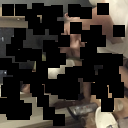

After auto encode noise removal


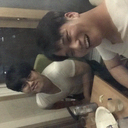

*** Trial 2
With noise:


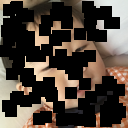

After auto encode noise removal


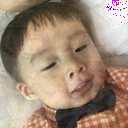

*** Trial 3
With noise:


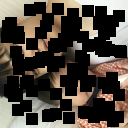

After auto encode noise removal


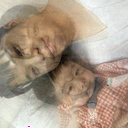

*** Trial 4
With noise:


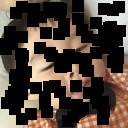

After auto encode noise removal


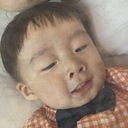

*** Trial 5
With noise:


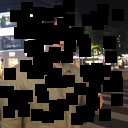

After auto encode noise removal


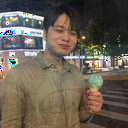

*** Trial 6
With noise:


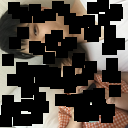

After auto encode noise removal


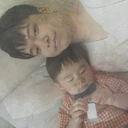

*** Trial 7
With noise:


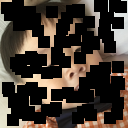

After auto encode noise removal


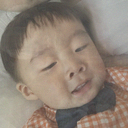

*** Trial 8
With noise:


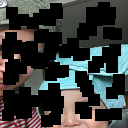

After auto encode noise removal


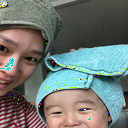

In [19]:
for z in range(8):
    print("*** Trial {}".format(z+1))
    
    # Choose random image
    i = np.random.randint(len(loaded_images))
    img = loaded_images[i]
    
#     img=test_img
#     img = make_square(img)
#     img = img.resize((128,128), Image.ANTIALIAS)

    img_array = np.asarray(img)
    cols, rows = img.size

    # Add noise
    img_array_noise = add_noise(img_array,10)    

    #Display noisy image
    img2 = img_array_noise.astype(np.uint8)
    img2 = Image.fromarray(img2, 'RGB')
    print("With noise:")
    display(img2)

    # Present noisy image to auto encoder
    img_array_noise = img_array_noise.flatten()
    img_array_noise = img_array_noise.astype(np.float32)
    img_array_noise = (img_array_noise-128)/128
    img_array_noise = np.array([img_array_noise])
    pred = model.predict(img_array_noise)[0]

    # Display neural result
    img_array2 = pred.reshape(128,128,3)
    img_array2 = (img_array2*128)+128
    img_array2 = img_array2.astype(np.uint8)
    img2 = Image.fromarray(img_array2, 'RGB')
#     img2 = img2.reshape(128,128,3)


    print("After auto encode noise removal")
    display(img2)

In [20]:
test_img_1=Image.open(".\\test\\test_me.JPG")
test_img_2=Image.open(".\\test\\IMG_6876.jpg")

FileNotFoundError: [Errno 2] No such file or directory: '.\\test\\test_me.JPG'

In [27]:
test_img_1=Image.open("IMG_E7211.JPG")
test_img_2=Image.open("IMG_7200.jpg")

In [28]:
# 아마 입력 이미지의 벡터 형식과 유사한 사진의 정보를 가져오는듯

*** Trial 1
With noise:


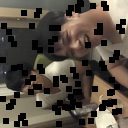

After auto encode noise removal


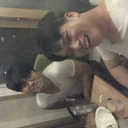

*** Trial 2
With noise:


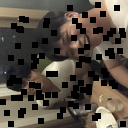

After auto encode noise removal


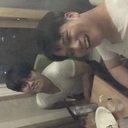

*** Trial 3
With noise:


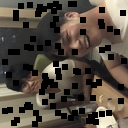

After auto encode noise removal


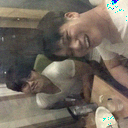

*** Trial 4
With noise:


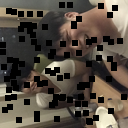

After auto encode noise removal


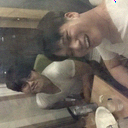

*** Trial 5
With noise:


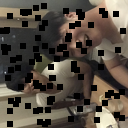

After auto encode noise removal


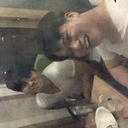

*** Trial 6
With noise:


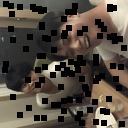

After auto encode noise removal


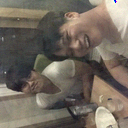

*** Trial 7
With noise:


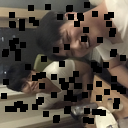

After auto encode noise removal


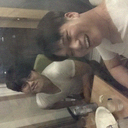

*** Trial 8
With noise:


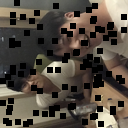

After auto encode noise removal


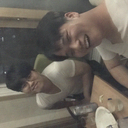

In [29]:
for z in range(8):
    print("*** Trial {}".format(z+1))
    
    img = test_img_2
    img = make_square(img)
    img = img.resize((128,128), Image.ANTIALIAS)

    img_array = np.asarray(img)
    cols, rows = img.size

    # Add noise
    img_array_noise = add_noise(img_array)    

    #Display noisy image
    img2 = img_array_noise.astype(np.uint8)
    img2 = Image.fromarray(img2, 'RGB')
    print("With noise:")
    display(img2)

    # Present noisy image to auto encoder
    img_array_noise = img_array_noise.flatten()
    img_array_noise = img_array_noise.astype(np.float32)
    img_array_noise = (img_array_noise-128)/128
    img_array_noise = np.array([img_array_noise])
    
    pred = model.predict(img_array_noise)[0]

    # Display neural result
    img_array2 = pred.reshape(rows,cols,3)
    img_array2 = (img_array2*128)+128
    img_array2 = img_array2.astype(np.uint8)
    img2 = Image.fromarray(img_array2, 'RGB')
    print("After auto encode noise removal")
    display(img2)

# Blurring Image

In [ ]:
import cv2

In [8]:
import os

In [27]:
img = cv2.imread('.\\IMG_7074.JPG',3)

In [28]:
b,g,r = cv2.split(img)           # get b, g, r
rgb_img = cv2.merge([r,g,b])     # switch it to r, g, b

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

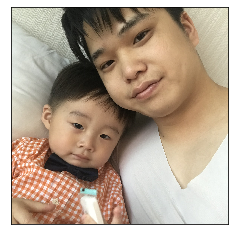

In [29]:
kernel = np.ones((5,5),np.float32)/25
dst = cv2.filter2D(rgb_img,-1,kernel)

plt.subplot(111),plt.imshow(rgb_img)
plt.xticks([]), plt.yticks([])

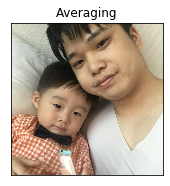

In [30]:
plt.subplot(122),plt.imshow(dst),plt.title('Averaging')
plt.xticks([]), plt.yticks([])
plt.show()

In [62]:
median = cv2.medianBlur(rgb_img,3)

(([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

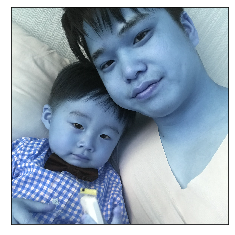

In [66]:
plt.subplot(111),plt.imshow(img)
plt.xticks([]), plt.yticks([])

In [50]:
def dif_gaus(image, lower, upper):
        lower, upper = int(lower-1), int(upper-1)
        lower = cv2.GaussianBlur(image,ksize=(lower,lower),sigmaX=0)
        upper = cv2.GaussianBlur(image,ksize=(upper,upper),sigmaX=0)
        # upper +=50
        # lower +=50
        dif = lower-upper
        # dif *= .1
        # dif = cv2.medianBlur(dif,3)
        # dif = 255-dif
        dif = cv2.inRange(dif, np.asarray(200),np.asarray(256))
        kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))
        dif = cv2.dilate(dif, kernel, iterations=2)
        dif = cv2.erode(dif, kernel, iterations=1)
        # dif = cv2.max(image,dif)
        # dif = cv2.dilate(dif, kernel, iterations=1)
        return dif 

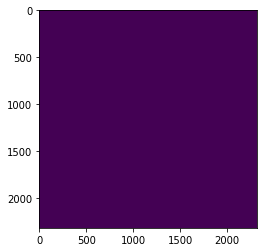

In [61]:
plt.imshow(dif_gaus(rgb_img,20,20))

(<matplotlib.axes._subplots.AxesSubplot at 0x20342daef08>,
 <matplotlib.image.AxesImage at 0x20342ddc4c8>)

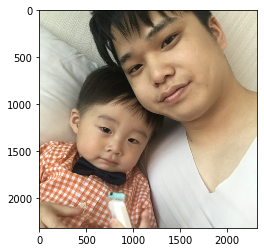

In [49]:
dst = cv2.GaussianBlur(rgb_img,(13,13),0)

plt.subplot(111),plt.imshow(dst)

In [68]:
cv2.imshow("Gaussian Blur",np.hstack((rgb_img, dst)))
# cv2.waitKey(0) # waits until a key is pressed
# cv2.destroyAllWindows()

In [72]:
img_test = cv2.imread('.\\IMG_7074.JPG')

In [73]:
kernel = np.ones((5,5), np.float32)/25
blur = cv2.filter2D(img_test, -1, kernel)

cv2.imshow('blur', blur)

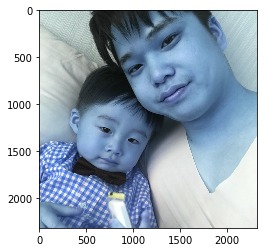

In [74]:
plt.imshow(blur)